# Pymaceuticals Inc.
---

### Analysis

- Please see attached word file: WdPymaceuticalsAnalysis.docx


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study = pd.merge(study_results, mouse_metadata, on='Mouse ID', how='left')

# Display the data table for preview
mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_study['Mouse ID'].nunique()

249

In [26]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

mouse_Timepoint = mouse_study.duplicated(['Mouse ID', 'Timepoint'])
mouse_double = mouse_study[mouse_Timepoint]['Mouse ID'].unique()
mouse_double


array(['g989'], dtype=object)

In [27]:
# Optional: Get all the data for the duplicate mouse ID.

duplicate_mouse_df = mouse_study[mouse_study['Mouse ID'].isin(mouse_double)]
print(duplicate_mouse_df.shape)
duplicate_mouse_df.head(20)

(13, 8)


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [28]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study = mouse_study.drop(mouse_study.loc[mouse_study['Mouse ID'].isin(mouse_double)].index)

clean_mouse_study.reset_index(drop = True, inplace = True)

clean_mouse_study.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [29]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study['Mouse ID'].nunique()

248

## Summary Statistics

In [30]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.

drug_regimen_grouped = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)']
drug_regimen_dict = {
                    'Mean Tumor Volume': 'mean',
                    'Median Tumor Volume': 'median',
                    'Tumor Volume Variance': 'var',
                    'Tumor Volume Std. Dev.': 'std',
                    'Tumor Volume Std. Err.': 'sem'
                    }
for key, value in drug_regimen_dict.items():
    drug_regimen_dict[key] = getattr(drug_regimen_grouped, value)()

drug_regimen_summary = pd.DataFrame(drug_regimen_dict)
drug_regimen_summary


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [31]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
drug_regimen_summary = clean_mouse_study.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
                                                                                          mean='mean',
                                                                                          median='median',
                                                                                          var='var',
                                                                                          std='std',
                                                                                          sem='sem'
                                                                                          )

drug_regimen_summary.columns = pd.MultiIndex.from_product([['Tumor Volume (mm3)'], drug_regimen_summary.columns])
drug_regimen_summary

# https://pandas.pydata.org/docs/reference/api/pandas.MultiIndex.from_product.html

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

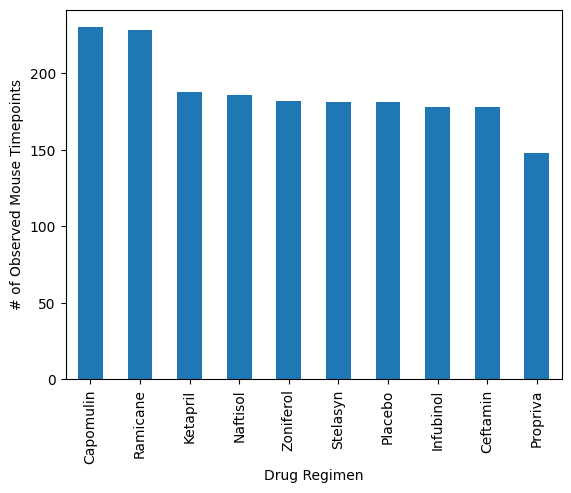

In [32]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

freq_drug_regimen = clean_mouse_study['Drug Regimen'].value_counts()
freq_drug_regimen.plot(kind="bar", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints")
plt.show()

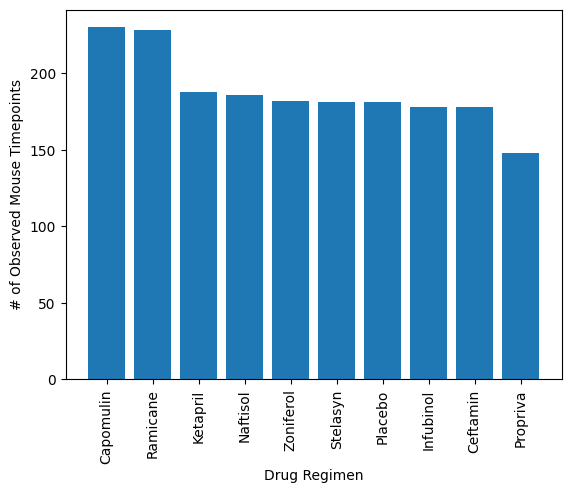

In [33]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
import numpy as np

freq_drug_regimen = clean_mouse_study['Drug Regimen'].value_counts()

# Set positions of bars on x-axis
x_pos = np.arange(len(freq_drug_regimen))

# Create the bar plot using pyplot
plt.bar(x_pos, freq_drug_regimen)

# Set the x-axis tick positions and labels
plt.xticks(x_pos, freq_drug_regimen.index, rotation=90)

plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

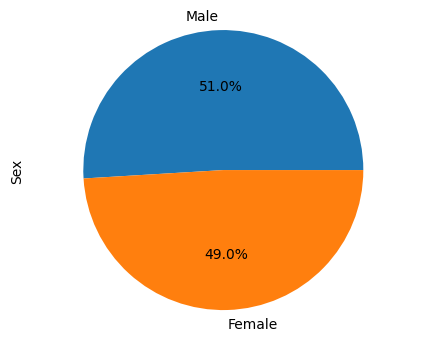

In [34]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of each 'Sex'.
freq_sex = clean_mouse_study['Sex'].value_counts().round(0)

freq_sex_pie = freq_sex.plot(kind="pie", y='Sex', autopct = '%1.1f%%', figsize=(5, 4))
freq_sex_pie.set_ylabel('Sex')
plt.axis('equal')
plt.show()


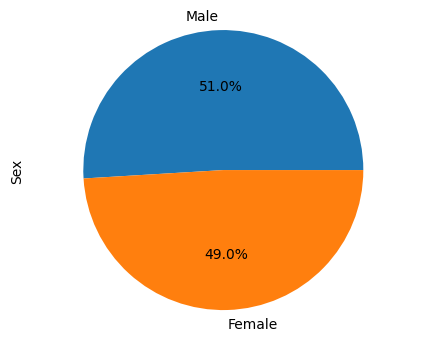

In [35]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
freq_sex = clean_mouse_study['Sex'].value_counts().round(0)

plt.figure(figsize=(5, 4))
plt.pie(freq_sex, labels=freq_sex.index, autopct='%1.1f%%')
plt.axis('equal')
plt.ylabel('Sex')
plt.show()

## Quartiles, Outliers and Boxplots

In [36]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_mouse_study.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(last_timepoint, clean_mouse_study, on=['Mouse ID', 'Timepoint'], how='left')
final_tumor_volume


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [37]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_4 = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting):
# list created in the 'for loop'

# Calculate the IQR and quantitatively determine if there are any potential outliers.

def outliers(drug_name):
    quartiles = final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug_name]['Tumor Volume (mm3)'].quantile([0.25, 0.5, 0.75])

    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)
    iqr = upperq - lowerq

    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)

    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume[(final_tumor_volume['Drug Regimen'] == drug_name)
                                  & ((final_tumor_volume['Tumor Volume (mm3)'] < lower_bound)
                                  | (final_tumor_volume['Tumor Volume (mm3)'] > upper_bound))]['Tumor Volume (mm3)']

    if outliers.empty:
        print(f"{drug_name}'s potential outliers: None found\n")
    else:
        print(f"{drug_name}'s potential outliers: {outliers}\n")


#  Creating dictionary for BoxPlot
drug_tumor_dict = {}

for drug in drug_regimen_4:

    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumor_volume = list(final_tumor_volume[final_tumor_volume['Drug Regimen'] == drug]['Tumor Volume (mm3)'])
    drug_tumor_dict[drug] = tumor_volume
    outliers(drug)


Capomulin's potential outliers: None found

Ramicane's potential outliers: None found

Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers: None found



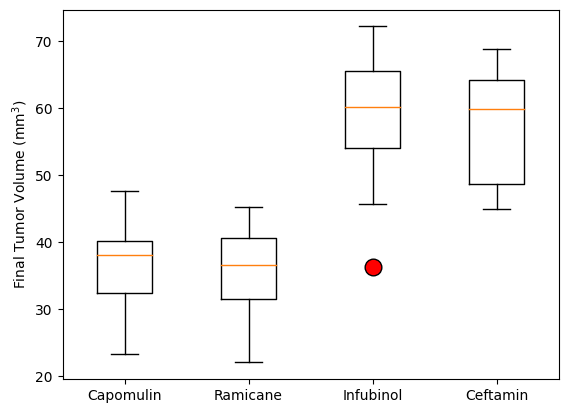

In [38]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.set_ylabel('Final Tumor Volume (mm$^3$)')

# Using dictionary created in the last cell
data = [drug_tumor_dict[key] for key in drug_tumor_dict]

# Box plot
box_props = dict(color='black')
outlier_props = dict(marker='o', markerfacecolor='red', markersize=12, markeredgecolor='black')

bp = ax.boxplot(data, labels=drug_tumor_dict.keys(), boxprops=box_props)
for flier in bp['fliers']:
    flier.set(**outlier_props)

plt.subplots_adjust(hspace=0.5)
plt.show()

# https://stackoverflow.com/questions/43342564/flier-colors-in-boxplot-with-matplotlib

## Line and Scatter Plots

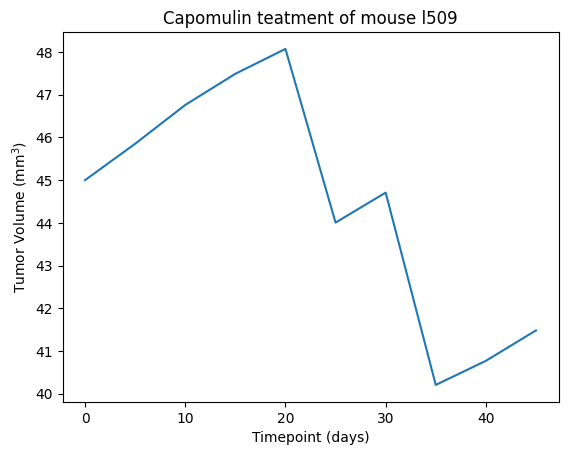

In [39]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter data for a specific mouse-id and drug_regimen
Capomulin_l509 = clean_mouse_study[(clean_mouse_study['Mouse ID'] == 'l509') & (clean_mouse_study['Drug Regimen'] == 'Capomulin')]

# Line plot
plt.plot(Capomulin_l509['Timepoint'], Capomulin_l509['Tumor Volume (mm3)'], marker = None)
plt.xlabel('Timepoint (days)')
plt.ylabel('Tumor Volume (mm$^3$)')
plt.title('Capomulin teatment of mouse l509')
plt.show()

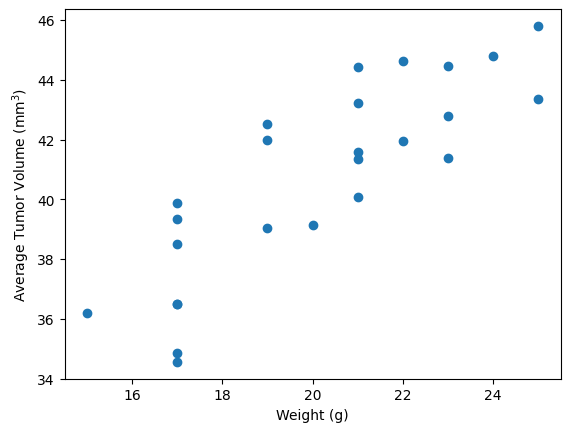

In [40]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_regimen = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse ID
average_tumor_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(2)

# weight of each mouse
mouse_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].first()

# Scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm$^3$)')
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


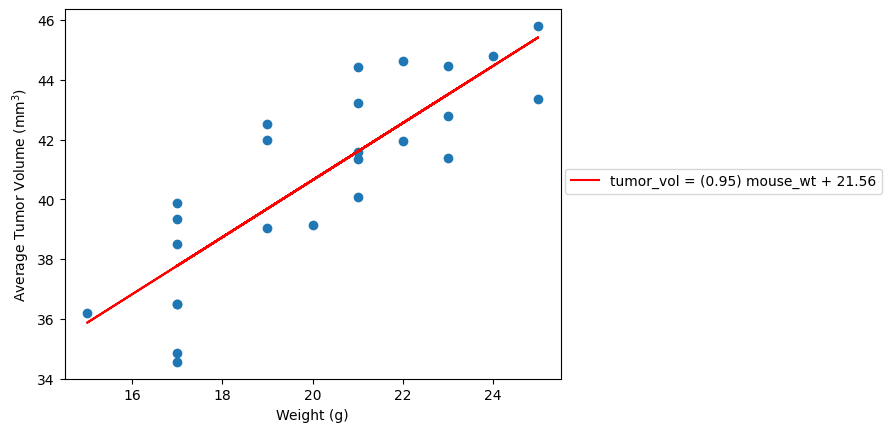

In [41]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter data for Capomulin regimen
capomulin_regimen = clean_mouse_study[clean_mouse_study['Drug Regimen'] == 'Capomulin']

# Calculate average tumor volume per mouse ID
average_tumor_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().round(2)

# Weight of each mouse
mouse_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].first()

# Scatter plot
plt.scatter(mouse_weight, average_tumor_volume)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm$^3$)')

# Correlation coefficient
correlation_coefficient, p_value = st.pearsonr(mouse_weight, average_tumor_volume)
print(f'The correlation between mouse weight and the average tumor volume is {correlation_coefficient: .2f}')

# Linear regression model
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weight, average_tumor_volume)
straight_line = f'tumor_vol = ({slope:.2f}) mouse_wt + {intercept:.2f}'
plt.plot(mouse_weight, (slope * mouse_weight + intercept), color='red', label = straight_line)
plt.legend(loc = (1.01, 0.5))

plt.show()

### Additional Plots for Analysis

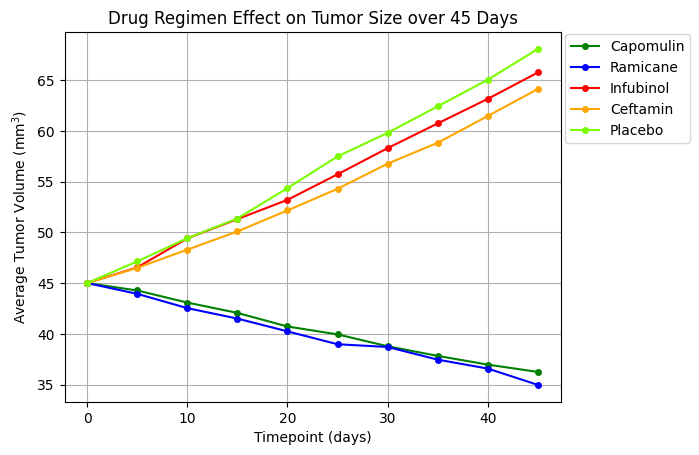

In [42]:
drug_regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin','Placebo']
drug_color = ['green', 'blue', 'red', 'orange', 'lawngreen']

drug_tumor_dict = {}

fig, ax = plt.subplots()
ax.set_ylabel('Average Tumor Volume (mm$^3$)')
ax.set_xlabel('Timepoint (days)')
ax.set_title('Drug Regimen Effect on Tumor Size over 45 Days', fontdict={'fontsize': 12})

for drug, color in zip(drug_regimen, drug_color):
    regimen = clean_mouse_study[clean_mouse_study['Drug Regimen'] == drug]
    tumor_size = regimen.groupby('Timepoint')['Tumor Volume (mm3)'].mean().round(2)
    drug_tumor_dict[drug] = tumor_size
    ax.plot(tumor_size.index, tumor_size, marker='o', markerfacecolor=color, markersize=4, color=color, label=drug)

plt.grid(True)
plt.legend(loc = (1.01, 0.7))
plt.show()

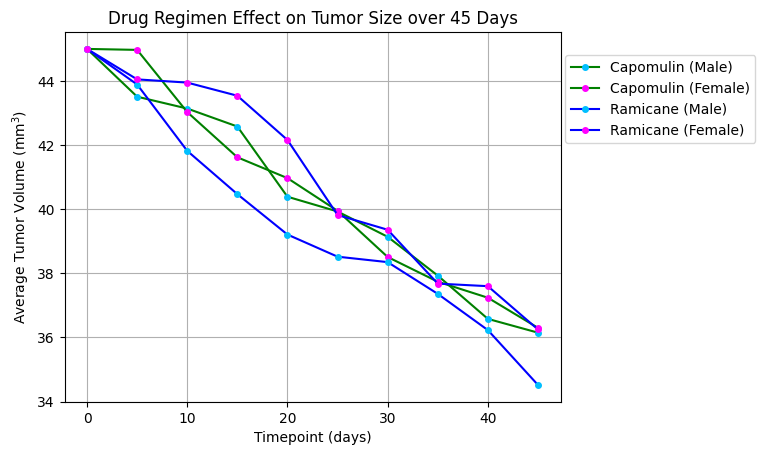

In [43]:
drug_regimen = ['Capomulin', 'Ramicane']
drug_color = ['green', 'blue']
gender = ['Male', 'Female']
gen_color = ['deepskyblue', 'fuchsia']

drug_tumor_dict = {}

fig, ax = plt.subplots()
ax.set_ylabel('Average Tumor Volume (mm$^3$)')
ax.set_xlabel('Timepoint (days)')
ax.set_title('Drug Regimen Effect on Tumor Size over 45 Days', fontdict={'fontsize': 12})

for drug, color in zip(drug_regimen, drug_color):
    for gen, gen_c in zip(gender, gen_color):
        regimen = clean_mouse_study[(clean_mouse_study['Drug Regimen'] == drug) & (clean_mouse_study['Sex'] == gen)]
        tumor_size = regimen.groupby('Timepoint')['Tumor Volume (mm3)'].mean().round(2)
        drug_tumor_dict[f'{drug} ({gen})'] = tumor_size
        ax.plot(tumor_size.index, tumor_size, marker='o', markerfacecolor=gen_c, markeredgecolor=gen_c, markersize=4, color=color, label=f'{drug} ({gen})')

plt.grid(True)
plt.legend(loc=(1.01, 0.7))
plt.show()